# MSP demo cvičení 2 - lineární regresní modely 
disclaimer: všechna "vzorová data" jsou vytvořena tak aby ilustrovala nějakou vlastnost OLS modelu a nejsou k nim nachystátny "příběhy"
#### plán útoku:
- intro do teorie lineární regrese
- výpočet koeficientů OLS modelu
- volba prediktorů
- kontrola předpokladů
- diagnostika modlu
- 1D -> 2D -> spojitý a kategoriální prediktor

Importuj co bude potřeba

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from matplotlib import cm

## úvod do lineární regrese
cílem je najít vhodný model závisle proměnné y (odezvy) pomocí (několika) vstupních proměnných (prediktorů) a jejich funkcí
lineární regrese (ordinary least squares - ols)
- pouze lineární kombinace "bázových" funkcí $ y=b_0 +b_1 f_1(x)+...+b_m f_m(x)+\epsilon  $
- prvním krokem úlohy je najít konstanty $b_0, ..., b_m$ - pro lineární model stačí minimalizovat součet čtverců

#### předpoklady
- $\epsilon \sim N(O,\sigma^2)$ chybový člen má normální rozdělení s nulovou střední hodnotou a konstantním rozptylem (homoskedasticita)
- nezávislost reziduí 



## regresní přímka
- nalezněte regresní přímku proměnné x pro vygenerovanou odezvu y 

$ y=b_0+b_1x + \epsilon $ 

- diskutujte kvalitu modelu




In [2]:
#počet pozorovnání
n=11
#vygeneruj data a zaokrouhli je 
np.random.seed(42)
x=np.round(np.random.uniform(1,10,n),2)
y=np.round(10+x+np.random.normal(0,1.5,n),2) # odezva je zašumněná přímka

#dataframe
df=pd.DataFrame({
    'x':x,
    'y':y
})


In [3]:
# přiřaď OLS přímkový model 
# statsmodels.formula.api používá notaci podobnou R
#model přímky
model=smf.ols(formula='y~x',data=df)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     31.96
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           0.000312
Time:                        15:04:33   Log-Likelihood:                -18.944
No. Observations:                  11   AIC:                             41.89
Df Residuals:                       9   BIC:                             42.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6654      0.942     10.262      0.0

c:\Users\Adam\Documents\school\MIT\1. sem\MSP\MSPvenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### základní popis výstupu (results.summary())
- R-squared -> koeficient determinace -> podíl vysvětlené variability pomocí modelu 
- Adj. R-squred -> adjustovaný koeficient determinace -> penalizuje modely za přidávání dalších prediktorů
- F-statistic; Prob (F-statistic) -> testové kriterium a p-hodnota pro sdružený test celého modelu. obecně $H_0: b_1=b_2=...=b_m=0 $ (použít cokoli jiného než průměr odezvy je zbytečné)
- coeff vypočtená hodnota regresního koeficientu
- t      P>|t|      [0.025      0.975] ->testové kriterium, p-hodnota a intervalový odhad pro daný koeficient. testuje $H_0: b_i=0 $ (tato část regresní funkce je v modelu zbytečná)
    - není dobrý nápad z modelu vyřazovat konstantu
- Omnibus; Prob(Omnibus);Jarque-Bera (JB);Prob(JB) -> testy normality reziduí pomocí šikmosti a špičatosti a p-hodnota $H_0:$ rezidua odpovídají výběru z normálního rozdělení
- Durbin-Watson -> test autokorelace (závislosti mezi "souseními" rezidui) hodnota 2 znamená žádnou autokorelaci
- Cond. No. -> číslo podmíněnosti matice plánu OLS modelu (menší je lepší)

## predikce podle OLS modelu
- spočtěte odhadované hodnoty odezvy a jejich konfidenční a predikční interval
- vykreslete graf (dokud sme v 1D :-) )



Text(0, 0.5, 'y - response')

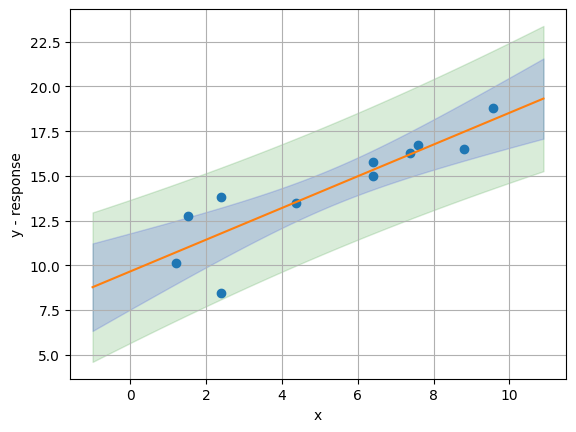

In [4]:
plt.plot(df.x,df.y,'o') #původní data
X_new = pd.DataFrame({'x':np.arange(-1,11,.1)}) #hodnoty ve kterých chci predikci (stejný název vysvětlujících proměnných jako v df s daty)
prediction=results.get_prediction(X_new)
pred = prediction.summary_frame(alpha=0.05) #95% intervaly
plt.plot(X_new['x'],pred['mean'])
plt.grid(True)
plt.fill_between(X_new['x'], pred['mean_ci_lower'] , pred['mean_ci_upper'], color='b', alpha=0.15)
plt.fill_between(X_new['x'], pred['obs_ci_lower'] , pred['obs_ci_upper'], color='g', alpha=0.15)
plt.xlabel('x')
plt.ylabel('y - response')

## polynom 2. stupně (parabola)
pokusíme se vylepšit stávající model
- použijeme větší počet bázových funkcí
- $y=b_0+b_1x+b_2x^2 +\epsilon$
- multikolinearita existuje i v 1D ("podobné" sloupce matice plánu)
    - VIF "míra multikolinearity" ideálně 1 bývá akceptováno VIF<10
        - vliv na predikci
        - při změně modelu se změní koeficienty
- jak se změní CI a PI predikce při "mírné extrapolci" složitějšího modelu



c:\Users\Adam\Documents\school\MIT\1. sem\MSP\MSPvenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     14.28
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00229
Time:                        15:04:34   Log-Likelihood:                -18.920
No. Observations:                  11   AIC:                             43.84
Df Residuals:                       8   BIC:                             45.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9389      1.763      5.639      0.0

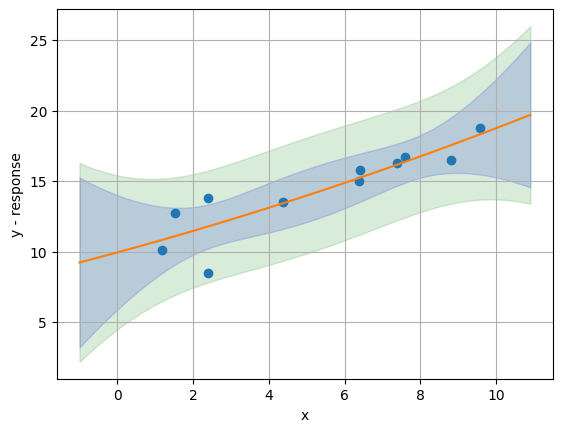

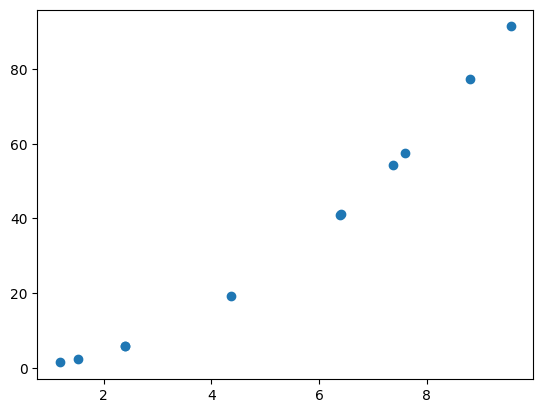

,VIF
Intercept,13.610510
x,25.482452
I(x ** 2),25.482452


In [5]:
model=smf.ols(formula='y~x+I(x**2)',data=df) # přepiš původní (lineární) model
results=model.fit()
print(results.summary())
#upozorni na významnost koeficientů, R^2 atp
# získej VIF a slož všechny VIF do dataframe
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

#ukaž jak bude vypadat predikce - při extrapolaci výrazně přibývá nejistota

plt.plot(df.x,df.y,'o') #původní data
X_new = pd.DataFrame({'x':np.arange(-1,11,.1)}) #hodnoty ve kterých chci predikci (stejný název vysvětlujících proměnných jako v df s daty)
prediction=results.get_prediction(X_new)
pred = prediction.summary_frame(alpha=0.05) #95% intervaly
plt.plot(X_new['x'],pred['mean'])
plt.grid(True)
plt.fill_between(X_new['x'], pred['mean_ci_lower'] , pred['mean_ci_upper'], color='b', alpha=0.15)
plt.fill_between(X_new['x'], pred['obs_ci_lower'] , pred['obs_ci_upper'], color='g', alpha=0.15)
plt.xlabel('x')
plt.ylabel('y - response')
plt.show()

#ještě vysvětlující obrázek x a x^2 z matice
plt.plot(df['x'],df['x']**2,'o')
plt.show()
vif_df

standardizace prediktorů
- snížení multikolinearity (pro polynom 2. stupně)
- srovnání "míry vlivu" pro účely testování koeficientů
- $\frac{x-\bar{x}}{s(x)}$ standardizace na 0 průměr a 1 směrodatnou odchylku (z-scores)
- $2\frac{x-\frac{max(x)+min(x)}{2}}{max(x)-min(x)} $ přeškálování na interval $\langle -1; 1 \rangle$

c:\Users\Adam\Documents\school\MIT\1. sem\MSP\MSPvenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     14.28
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00229
Time:                        15:04:35   Log-Likelihood:                -18.920
No. Observations:                  11   AIC:                             43.84
Df Residuals:                       8   BIC:                             45.03
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2139      0.815     17.438      0.0

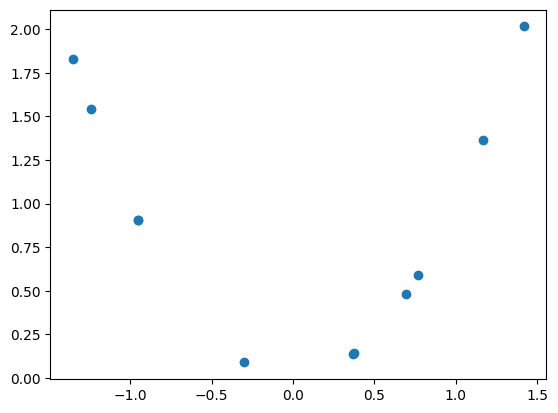

In [6]:
#nové df ať mám separátně původní data
dfS=df.copy() 
dfS['x']=(dfS['x']-dfS['x'].mean())/dfS['x'].std() #odečti průměr a poděl směrodatnou odchylkou
dfSS=df.copy()
dfSS['x']=(dfSS['x']-((dfSS['x'].max()+dfSS['x'].min())/2))/(dfSS['x'].max()-dfSS['x'].min())*2
#fitni stejný model nad dfS nebo dfSS
#upozorni na výsledky testů koeficientů
#modely překlikni "ručně" ukaž že +- funguje oboje
model=smf.ols(formula='y~x+I(x**2)',data=dfS)
results=model.fit()
print(results.summary())

X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)

vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']

print('\n\n\n')
print(vif_df)
print('\n\n\n')
print(X.corr())

#ještě vysvětlující obrázek x a x^2 z matice
plt.plot(dfS['x'],dfS['x']**2,'o')
plt.show()

## Outliery 
- pozorujmě vliv outlierů na ols model
- zde popsané je "nad" rámec standardní diskuse o odlehlých hodnotách
- všechny staty mají přímou vazbu na OLS model (a jejich výpočet zahrnuje v nějaké formě matici plánu)
- leverage
    - za "velké" leverage se obvykle považuje >$\frac{3\# prediktorů}{\# měření}$ (počet prediktorů zde zahrnuje konstatnu - intercept)
    - vlivné pozorování protože je daleko od ostatních v hodnotách prediktorů -> bude mít velký vliv na model
- standardizovaná rezidua (studentizovaná)
    - pro identifakaci bodů které model "špatně popisuje"
        - za pozornost stojí body se standardizovaným reziduem v absolutní hodnotě > 2
        - studentizovaná rezidua lze porovnávat s vhodným kvantilem studentova rozdělení
- Cook's distance kombinuje obě předchozí charakteristiky
    - lze testovat outlier ve smyslu Cook's distance

c:\Users\Adam\Documents\school\MIT\1. sem\MSP\MSPvenv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     4.867
Date:                Sun, 03 Dec 2023   Prob (F-statistic):             0.0496
Time:                        15:04:35   Log-Likelihood:                -31.731
No. Observations:                  13   AIC:                             67.46
Df Residuals:                      11   BIC:                             68.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6771      1.628      6.560      0.0

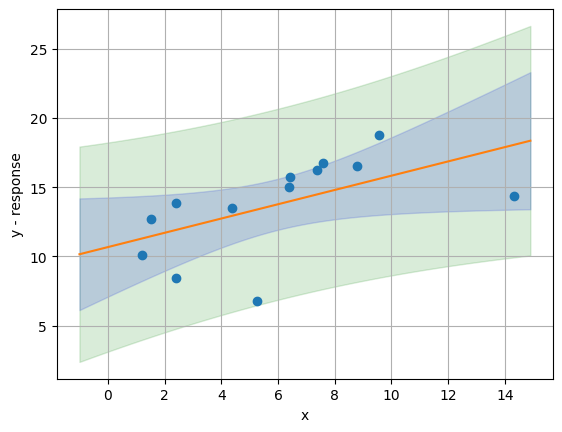

In [7]:
#přidej outlier a věc s velkým reziduem #přidej vyktreslenej obrázek
#zapínej postupně - velký reziduum málo pohne s coeff, velká páka pohne s coeff "dost"
dfO=df.copy()
dfO.loc[11]=[df['x'].mean(), df['y'].mean()-df['y'].std()*2.5] # velký reziduum
dfO.loc[12]=[df['x'].mean()+df['x'].std()*3, df['y'].mean()] # velká leverage 3 směrodatný odchylky

model=smf.ols(formula='y~x',data=dfO) #pak ukázat změny pro vlivný/hnusný pozorování
results=model.fit()
print(results.summary())


influence = results.get_influence()
# Leverage 
leverage = influence.hat_matrix_diag
# Cookovy D hodnoty (a p-hodnoty) jako n-tice polí [n x 2]
cooks_d = influence.cooks_distance
# Standardizovaná rezidua
standardized_residuals = influence.resid_studentized_internal
# Studentizovaná rezidua
studentized_residuals = influence.resid_studentized_external
#tabulka dohromady dořešit změny počtu řádků
outl_stats_df = pd.DataFrame({
    'Leverage': leverage,
    'Standardized Residuals': standardized_residuals,
    'Studentized Residuals': studentized_residuals,
    'Cook\'s Distance': cooks_d[0],
    'Cook\'s Distance_p-value': cooks_d[1]
}, index=dfO.index)
#vyber jen "zajímavý" hodnoty
outl_stats_df = outl_stats_df[(outl_stats_df['Leverage'] > 3*len(results.params)/dfO.shape[0]) | (np.abs(outl_stats_df['Standardized Residuals']) > 2) | (outl_stats_df['Cook\'s Distance_p-value'] < 0.05)]


print(outl_stats_df)

plt.plot(dfO.x,dfO.y,'o') #původní data
X_new = pd.DataFrame({'x':np.arange(-1,15,.1)}) #hodnoty ve kterých chci predikci (stejný název vysvětlujících proměnných jako v df s daty)
prediction=results.get_prediction(X_new)
pred = prediction.summary_frame(alpha=0.05) #95% intervaly
plt.plot(X_new['x'],pred['mean'])
plt.grid(True)
plt.fill_between(X_new['x'], pred['mean_ci_lower'] , pred['mean_ci_upper'], color='b', alpha=0.15)
plt.fill_between(X_new['x'], pred['obs_ci_lower'] , pred['obs_ci_upper'], color='g', alpha=0.15)
plt.xlabel('x')
plt.ylabel('y - response')
plt.show()

## dignostické grafy pro OLS modely
- vhodnější pro "rozumné" množství pozorování
- normalita reziduí/tvar
    - histogram
    - Q-Q graf
- ostatní předpoklady
    - rezidua vs pořadí (čas)
    - rezidua vs fit
    - rezidua vs prediktory (více než 1 prediktor)


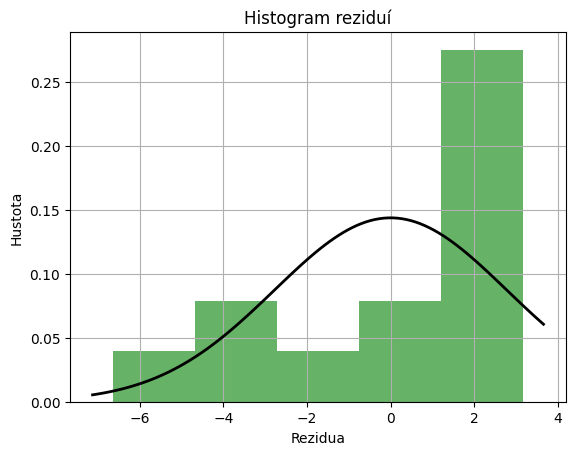

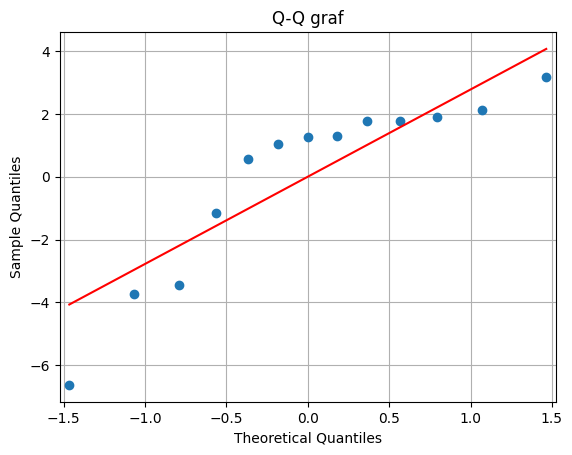

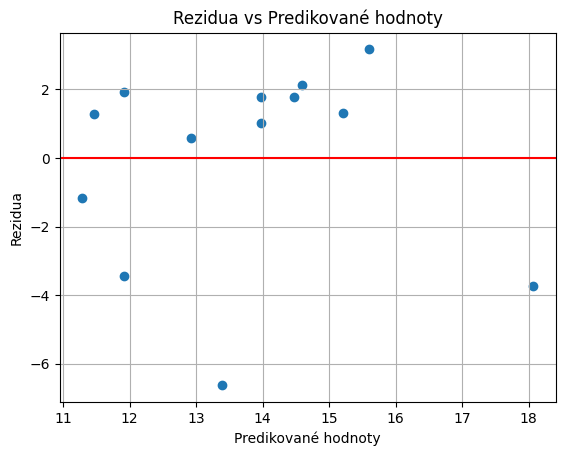

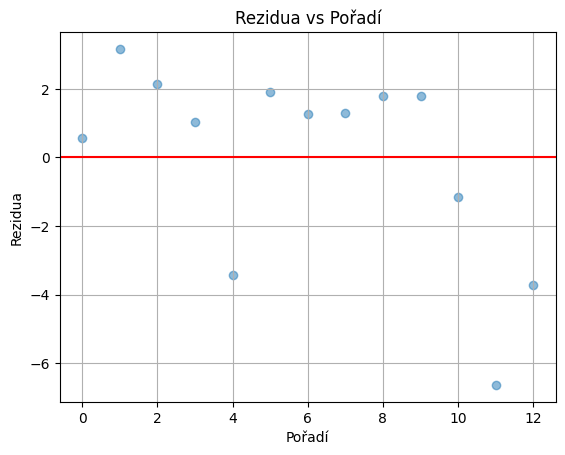

In [8]:
# Vykreslení histogramu reziduí - pro málo pozorování moc nedává smysl
plt.hist(results.resid, bins='auto', density=True, alpha=0.6, color='g')

# Vykreslení odpovídající Gaussovy křivky
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(results.resid), np.std(results.resid))
plt.plot(x, p, 'k', linewidth=2)
plt.grid(True)
plt.title("Histogram reziduí")
plt.xlabel("Rezidua")
plt.ylabel("Hustota")

plt.show()
#q-q plot
qqplot(results.resid, line='s')
plt.title('Q-Q graf')
plt.grid(True)
plt.show()

#res vs fit
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid(True)
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.title('Rezidua vs Predikované hodnoty')
plt.show()

# res vs order
plt.scatter(range(len(results.resid)), results.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid(True)
plt.title("Rezidua vs Pořadí")
plt.xlabel("Pořadí")
plt.ylabel("Rezidua")

plt.show()

## OLS s více spojitými prediktory (2D)
- nalezněte vhodný regresní OLS model proměnné y pomocí různě vygenerovaných prediktorů $x_1$ a $x_2$
- $y=b_0+b_1x_1+b_2x_2+b_{12}x_1x_2+\epsilon$
- rozlišitelnost prediktorů
    - ortogonalita sloupců matice plánu (DoE)
    - "běžný" stav
    - multikolinearita
### Ortogonální prediktory (DoE)
- vyřazení prediktoru z modelu neovlivní prediktory, které reprezentuje ortogonální sloupec (jsou dokonale rozlišitelné)
- pro zvolená vygenerovaná data, nelze rozlišit mezi kvadráty


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     7.408
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           0.000113
Time:                        15:04:37   Log-Likelihood:                -108.57
No. Observations:                  50   AIC:                             227.1
Df Residuals:                      45   BIC:                             236.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8680      0.707     13.951      0.0

C:\Users\Adam\AppData\Local\Temp\ipykernel_21208\309907354.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y=results.params[0]+results.params[1]*X1+results.params[2]*X2+results.params[3]*X1*X2
c:\Users\Adam\Documents\school\MIT\1. sem\MSP\MSPvenv\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


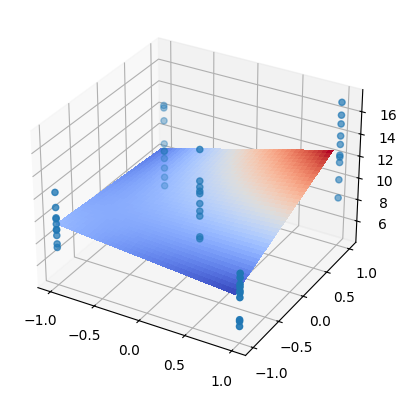

In [9]:
np.random.seed(7)
x1=np.tile(np.array([-1,1]),20)
x2=np.repeat(np.array([-1,1]),20)
x1=np.append(x1,np.array([0,0,0,0,0,0,0,0,0,0]))
x2=np.append(x2,np.array([0,0,0,0,0,0,0,0,0,0]))
#vytvoř odezvu
y=10+x1+x2+x1*x2+np.random.normal(0,2,50)
#vytvoř dataframe
df2=pd.DataFrame({'x1':x1, 'x2':x2,'y':y})
model=smf.ols(formula='y~x1+x2+x1*x2+I(x1**2)+I(x2**2)',data=df2) #ukaž že změna sady prediktorů nemění ostatní koeficienty
# ukaž nerozlišitelnost kvadrátů - přidej do modelu 

results=model.fit()
print(results.summary())

#pro graf
X1 = np.arange(-1, 1, 0.05)
X2 = np.arange(-1, 1, 0.05)
X1,X2=np.meshgrid(X1,X2)
Y=results.params[0]+results.params[1]*X1+results.params[2]*X2+results.params[3]*X1*X2 
# Y=results.params[0]+results.params[1]*X1+results.params[2]*X2+results.params[3]*X1*X2+10*X1*X1+10*X2*X2 #pro kvadráty jen pro ilustraci co se může dít ale nejde poznat skrz matici

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df2.x1,df2.x2,df2.y)
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=0, antialiased=False)

X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']
print('\n\n\n')
print(vif_df)
#ukaž korelaci prediktorů
print('\n\n\n')
print(X.corr()) 

### 2D "standardní" stav
- náhodná síť x1 x2, jen mají dost různé škály
    - různé škály (jednotky) deformují model -> standardizace


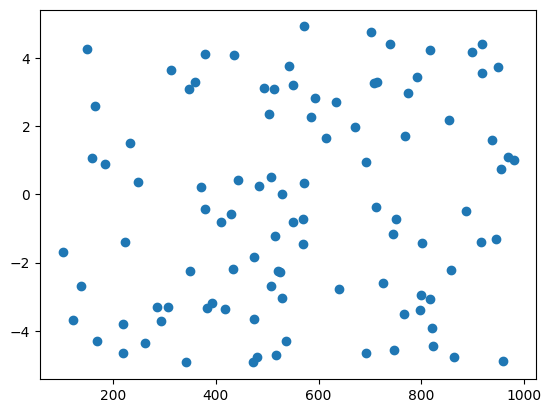

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.23e-48
Time:                        15:04:38   Log-Likelihood:                -591.84
No. Observations:                 100   AIC:                             1192.
Df Residuals:                      96   BIC:                             1202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8377     24.485      0.198      0.8

In [10]:
#vygeneruj smysluplné množství dat, 2 spojité (ukaž vliv různých jednotek)
np.random.seed(7)
x1=np.random.uniform(100,1000,100)
x2=np.random.uniform(-5,5,100)
y1=x1+x2+0.060*x1*x2+np.random.normal(0,100,100)
df2=pd.DataFrame({'x1':x1,'x2':x2,'y':y1})
#pokrytí ilustruj obrázkem
plt.scatter(x1,x2,marker='o')
plt.show()

model=smf.ols(formula='y~x1+x2+x1*x2',data=df2)
results=model.fit()
print(results.summary())
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)

vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']

print('\n\n\n')
print(vif_df)
print('\n\n\n')
print(X.corr())

#### po standardizaci
- změna koeficientů a významnosti - vyvážení různých škál (jednotek) 

In [11]:
#standardizuj prediktory
dfSS2=df2.copy()
dfSS2['x1']=(dfSS2['x1']-((dfSS2['x1'].max()+dfSS2['x1'].min())/2))/(dfSS2['x1'].max()-dfSS2['x1'].min())*2
dfSS2['x2']=(dfSS2['x2']-((dfSS2['x2'].max()+dfSS2['x2'].min())/2))/(dfSS2['x2'].max()-dfSS2['x2'].min())*2

#ukaž změnu p-values, VIF a cond.no.  po standardizaci 
# vliv prediktorů už není zcela oddělitelný (mění se koeficienty a testový kriteria/p-hodnoty při změně modelu) 
model=smf.ols(formula='y~x1+x2+x1*x2',data=dfSS2)
results=model.fit()
print(results.summary())
X = pd.DataFrame(model.exog, columns=model.exog_names)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)

vif_df = vif.to_frame()
# Nastavení názvu sloupce
vif_df.columns = ['VIF']

print('\n\n\n')
print(vif_df)
print('\n\n\n')
print(X.corr())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.23e-48
Time:                        15:04:39   Log-Likelihood:                -591.84
No. Observations:                 100   AIC:                             1192.
Df Residuals:                      96   BIC:                             1202.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    542.4263      9.457     57.357      0.0

### závislé prediktory
- multikolinearita


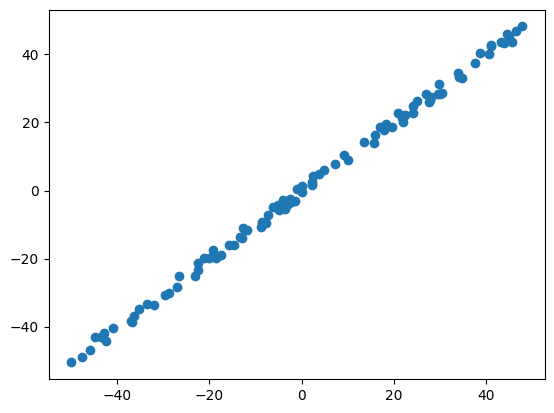

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.30e-07
Time:                        15:10:08   Log-Likelihood:                -592.59
No. Observations:                 100   AIC:                             1191.
Df Residuals:                      97   BIC:                             1199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2167      9.303     -0.023      0.9

In [21]:
np.random.seed(7)
x1=np.random.uniform(-50,50,100)
x2=x1+np.random.uniform(-2,2,100)
y1=x1+x2+np.random.normal(0,100,100)
df2=pd.DataFrame({'x1':x1,'x2':x2,'y':y1})
#pokrytí ilustruj obrázkem
plt.scatter(x1,x2,marker='o')
plt.show()

model2DM1=smf.ols(formula='y~x1+x2',data=df2)
results2DM1=model2DM1.fit()
print(results2DM1.summary())


model2DM2=smf.ols(formula='y~x1',data=df2)
results2DM2=model2DM2.fit()
print(results2DM2.summary())


model2DM3=smf.ols(formula='y~x2',data=df2)
results2DM3=model2DM3.fit()
print(results2DM3.summary())

### leverage při více prediktorech
- zohledňuje vícerozměrnost dat (vazba na Mahalanobisovu vzdálenost)
- rozdílný vliv rozdílně pozicovaných bodů s podobným leverage

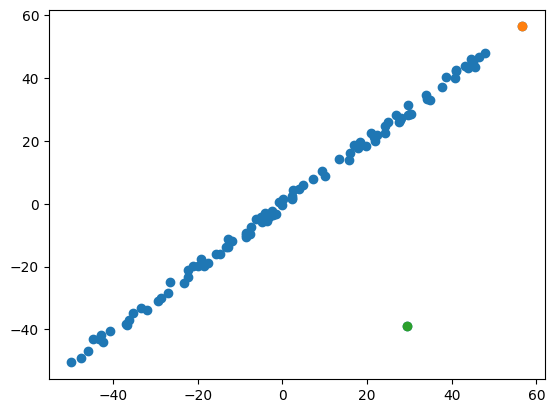

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     17.00
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           4.51e-07
Time:                        15:11:12   Log-Likelihood:                -604.46
No. Observations:                 102   AIC:                             1215.
Df Residuals:                      99   BIC:                             1223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9334      9.206     -0.210      0.8

In [23]:
#pokračuj s daty výše
df2.loc[101]=[df2['x1'].mean()+df2['x2'].std()*2,df2['x2'].mean()+df2['x2'].std()*2, df2['y'].mean()] # velká páka v 1D 
df2.loc[102]=[df2['x1'].mean()+df2['x2'].std()*1,df2['x2'].mean()-df2['x2'].std()*1.5, df2['y'].mean()] # velká páka ve 2D 
plt.scatter(df2.x1,df2.x2,marker='o')
plt.scatter(df2.x1[101],df2.x2[101],marker='o')
plt.scatter(df2.x1[102],df2.x2[102],marker='o')
plt.show()
model2DMO=smf.ols(formula='y~x1+x2',data=df2)
results2DMO=model2DMO.fit()
print(results2DMO.summary())

influence = results2DMO.get_influence()

# Leverage 
leverage = influence.hat_matrix_diag
# Cookovy D hodnoty (a p-hodnoty) jako n-tice polí [n x 2]
cooks_d = influence.cooks_distance
# Standardizovaná rezidua
standardized_residuals = influence.resid_studentized_internal
# Studentizovaná rezidua
studentized_residuals = influence.resid_studentized_external
#tabulka dohromady dořešit změny počtu řádků
outl_stats_df = pd.DataFrame({
    'Leverage': leverage,
    'Standardized Residuals': standardized_residuals,
    'Studentized Residuals': studentized_residuals,
    'Cook\'s Distance': cooks_d[0],
    'Cook\'s Distance_p-value': cooks_d[1]
}, index=df2.index)
#vyber jen "zajímavý" hodnoty
outl_stats_df = outl_stats_df[(outl_stats_df['Leverage'] > 3*len(results.params)/df2.shape[0]) | (np.abs(outl_stats_df['Standardized Residuals']) > 2) | (outl_stats_df['Cook\'s Distance_p-value'] < 0.05)]


print(outl_stats_df)

## mix kategoriálních a spojitých proměnných
- nalezněte model odezvy zahrnující kategoriální proměnnou
- dummy variables (a jejich kodování)
    - testování vlivu jako bloku (sdružená hypotéza)
- vyváženost počtu pozorování v kategriích
- interakce s kategoriální proměnnou


cat2   D   E   F   G   H   I
cat1                        
A     50  54   0   0   0   0
B      0   0  50  42   0   0
C      0   0   0   0  48  56
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     51.74
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.08e-61
Time:                        15:26:09   Log-Likelihood:                -414.34
No. Observations:                 300   AIC:                             852.7
Df Residuals:                     288   BIC:                             897.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      

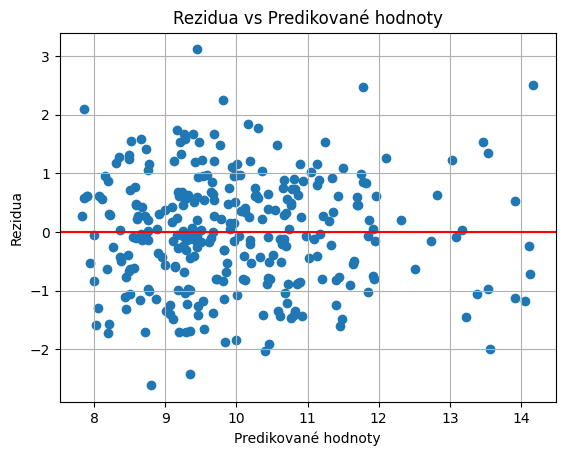

In [40]:
#koemtovaný řádky jsou vnořená proměnná
np.random.seed(13)
c1=np.array(['A','B','C'])
c2=np.array(['D','E'])
c2={'A':['D','E'],'B':['F','G'],'C':['H','I']}
x1=np.random.uniform(-1,1,300)
cat1=np.random.choice(c1,300)
# cat2=np.random.choice(c2,300)
cat2=[np.random.choice(c2[c]) for c in cat1]

df3=pd.DataFrame({'cat1':cat1,'cat2':cat2,'x1':x1})
mat=pd.get_dummies(df3,drop_first=True)
mat=mat.astype(float)

y=10+mat.x1+mat['cat1_B']-mat['cat1_C']+mat['cat2_E']+2*x1*mat['cat2_E']+np.random.normal(0,1,300)

df3['y']=y
model=smf.ols(formula='y~x1+C(cat1)+C(cat2)+x1*C(cat2)',data=df3) #tady upravuj model
results=model.fit()
print(pd.crosstab(df3['cat1'],df3['cat2']))
print(results.summary())

hypothesis='(C(cat1)[T.B]=0),(C(cat1)[T.C]=0)' # ak chceme testovat kategorialnu premennu ako celok = separatny Ftest
F_test=results.f_test(hypothesis)
print(F_test)

#ukaž vliv chybějícího významného prediktoru na res vs fit
#res vs fit
plt.scatter(results.fittedvalues, results.resid)
plt.axhline(y=0, color='r', linestyle='-') 
plt.grid(True)
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.title('Rezidua vs Predikované hodnoty')
plt.show()

další témata k diskusi
- algoritmické selekce modelu 
    - testování hypotéz
    - informační kriteria
    - regularizace 
- hledání optimálního nastavení prediktorů podle modelu
- kategoriální odezva (logistická regrese)